# 数据分析

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import cx_Oracle as oracle

import os 
os.environ['NLS_LANG'] = 'SIMPLIFIED CHINESE_CHINA.UTF8' 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
#conn = oracle.connect('NNSCUSER','NNSCUSER','192.168.1.171/orcl')

In [4]:
table_name = ['CMP3$97678',
              'MT_CF_PAGEQUERY',
              'MT_CF_QUERYCHART',
              'MT_CF_QUERYCOLUMNALARM',
              'MT_CF_QUERYCOLUMNS',
              'MT_CF_QUERYFUNCTION',
              'MT_CF_QUERYSINGCHART',
              'MT_DC_CONVEYANCE_PRODUCTION',
              'MT_DC_PB_MACHINEAREA',
              'MT_DC_PB_MACHINEGROUP',
              'MT_DC_PB_PARAMCODE',
              'MT_DC_PB_REJECTCODE',
              'MT_DC_PB_REJECTTYPE',
              'MT_DC_PB_REQUESTCODE',
              'MT_DC_PB_STATUSCODE',
              'MT_DC_PB_STOPCODE',
              'MT_DC_PB_WASTECODE',
              'MT_DC_PB_WEIGHT_CODE',
              'MT_DC_PM_LONGSTOPCODE',
              'MT_DC_PM_MP_FILETYPE',
              'MT_DC_PM_MP_GD102DATA_CUR',
              'MT_DC_PM_MP_GD1057DATA_CUR',
              'MT_DC_PM_MP_PT102DATA_CUR',
              'MT_DC_PM_MP_PT1057DATA_CUR',
              'MT_DC_PM_MP_TS102DATA',
              'MT_DC_ZX102_CUR',
              'MT_PB_CLASS',
              'MT_PB_INFOCLASS',
              'MT_PB_ISVALID',
              'MT_PB_MACHINE',
              'MT_PB_MACHINECLASS',
              'MT_PB_MACHINEPART',
              'MT_PB_MACHINESTATUS',
              'MT_PB_MACHINETYPE',
              'MT_PB_MACHINETYPEPART',
              'MT_PB_NEWSTYPE',
              'MT_PB_NOTICEBOARD',
              'MT_PB_NOTICERECEIVE',
              'MT_PB_ORG',
              'MT_PB_POST',
              'MT_PB_PRODUCT',
              'MT_PB_PRODUCTCATENA',
              'MT_PB_SHIFT',
              'MT_PB_SHIFTARRANGE',
              'MT_PB_UNIT',
              'MT_QL_PARAMETER',
              'TEST_DATA',
              'TEST_MAIN']

tables = {}
table_num = [7, 11, 15, 20, 21, 22, 23, 25, 29, 40, 46, 47, 1, 2, 4, 6, 10, 14, 16, 17, 30, 32, 33]
# for n in table_num:
#     tn = table_name[n]
#     sql = 'select * from ' + tn
#     df = pd.read_sql(sql, conn)
#     tables[tn] = df
#     df.to_csv(tn + '.csv')

In [5]:
# tb_20 = tables[table_name[20]]
tb_20 = pd.read_csv('MT_DC_PM_MP_GD102DATA_CUR.csv')
# tb_21 = tables[table_name[21]]
tb_21 = pd.read_csv('MT_DC_PM_MP_GD1057DATA_CUR.csv')
# tb_22 = tables[table_name[22]]
tb_22 = pd.read_csv('MT_DC_PM_MP_PT102DATA_CUR.csv')
# tb_23 = tables[table_name[23]]
tb_23 = pd.read_csv('MT_DC_PM_MP_PT1057DATA_CUR.csv')
# tb_46 = tables[table_name[46]]
tb_46 = pd.read_csv('TEST_DATA.csv')
# tb_47 = tables[table_name[47]]
tb_47 = pd.read_csv('TEST_MAIN.csv')
# tb_07 = tables[table_name[7]]
# tb_25 = tables[table_name[25]]

## 表20  MT_DC_PM_MP_GD102DATA_CUR  包装机生产数据

In [6]:
tb_20_new = tb_20[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'INTERNALSTOPTIME',
                   'RUNTIME', 'PRODUCETIME', 'THEORETICALPRODUCTION','REALPRODUCTION', 'REJECTPRODUCTION',
                   'EFFPRODUCTION', 'EFFMACHINE', 'STOPCNT']]
tb_20_new.head()

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,INTERNALSTOPTIME,RUNTIME,PRODUCETIME,THEORETICALPRODUCTION,REALPRODUCTION,REJECTPRODUCTION,EFFPRODUCTION,EFFMACHINE,STOPCNT
0,2015-11-11,3,202,10001586,2015-11-12 07:20:04,1568,24467,22155,158153,126910,180,80.0,73.0,21
1,2015-11-11,3,202,10001586,2015-11-12 07:20:04,3832,22203,22203,164888,126932,1094,77.0,77.0,80
2,2015-11-11,3,215,10001586,2015-11-12 07:20:01,2094,23941,20477,150473,124130,120,82.0,72.0,25
3,2015-11-11,3,215,10001586,2015-11-12 07:20:02,5632,20403,20403,164888,123815,977,75.0,75.0,258
4,2015-11-11,3,220,10001586,2015-11-12 07:20:04,3969,22066,20322,161940,113730,190,70.0,66.0,33


In [7]:
tb_20_clear = tb_20_new.query('INTERNALSTOPTIME < 50000 & RUNTIME < 50000 & PRODUCETIME < 50000 & THEORETICALPRODUCTION < 500000 & REJECTPRODUCTION < 20000')

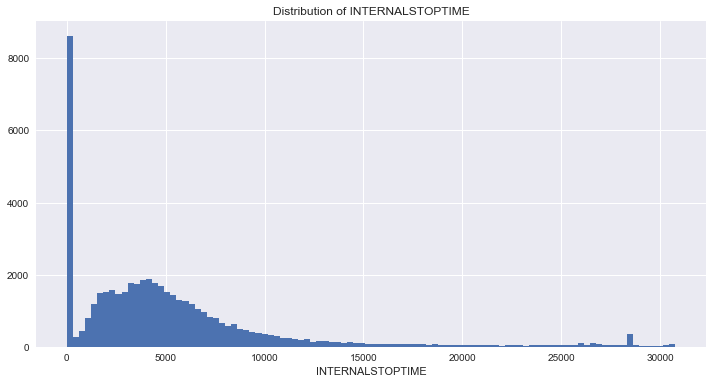

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'INTERNALSTOPTIME'], 100)
plt.title('Distribution of INTERNALSTOPTIME')  
plt.xlabel('INTERNALSTOPTIME')  
plt.show()

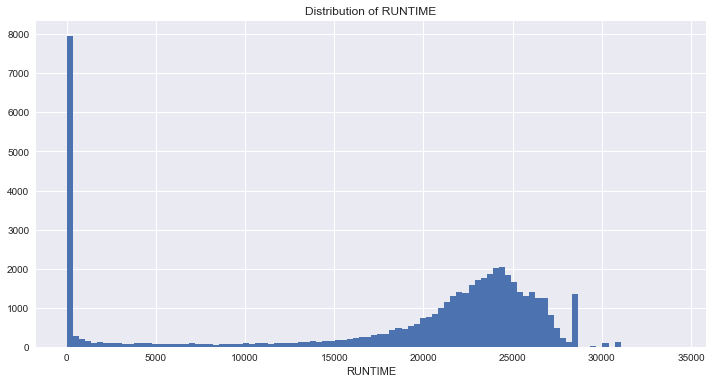

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'RUNTIME'], 100)
plt.title('Distribution of RUNTIME')  
plt.xlabel('RUNTIME')  
plt.show()

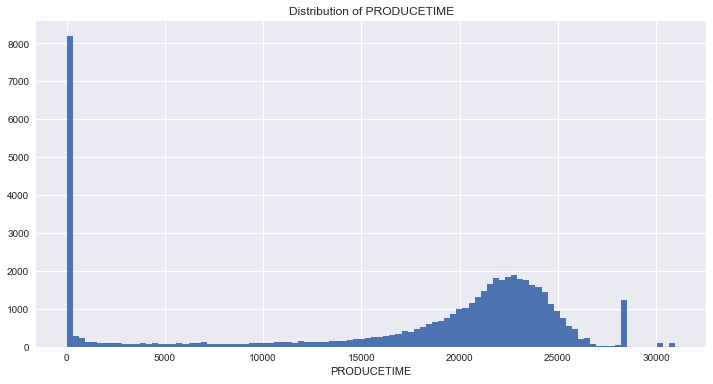

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'PRODUCETIME'], 100)
plt.title('Distribution of PRODUCETIME')  
plt.xlabel('PRODUCETIME')  
plt.show()

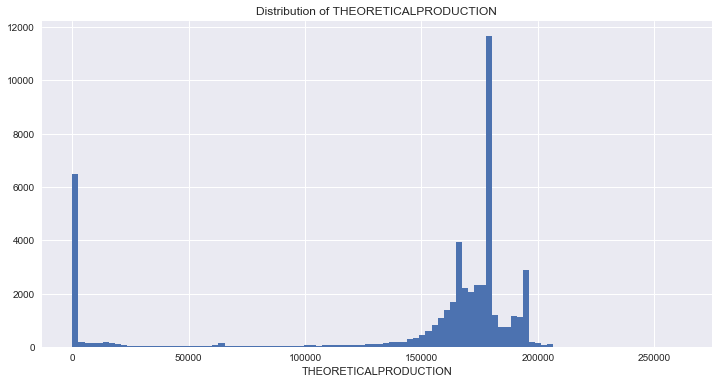

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'THEORETICALPRODUCTION'], 100)
plt.title('Distribution of THEORETICALPRODUCTION')  
plt.xlabel('THEORETICALPRODUCTION')  
plt.show()

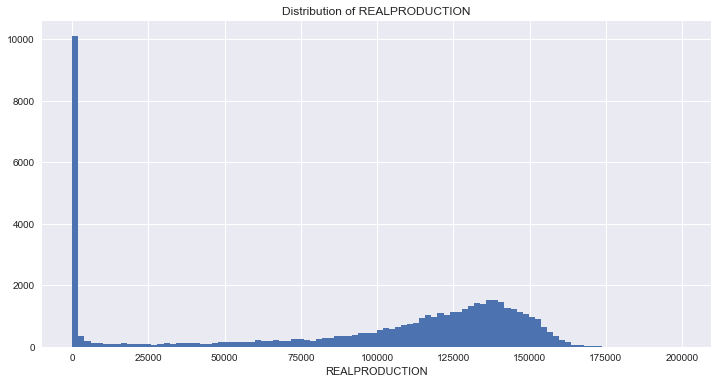

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'REALPRODUCTION'], 100)
plt.title('Distribution of REALPRODUCTION')  
plt.xlabel('REALPRODUCTION')  
plt.show()

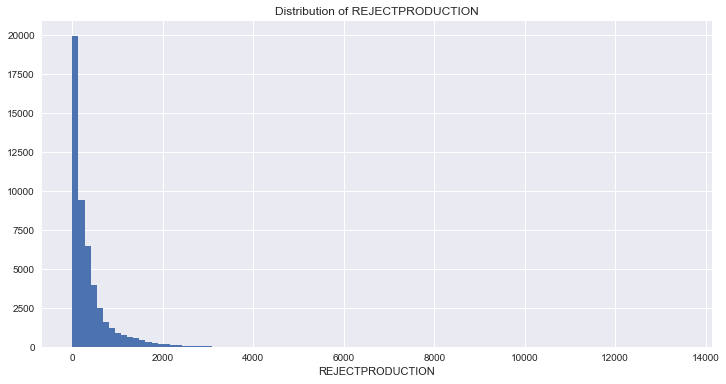

In [13]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_clear.loc[:, 'REJECTPRODUCTION'], 100)
plt.title('Distribution of REJECTPRODUCTION')  
plt.xlabel('REJECTPRODUCTION')  
plt.show()

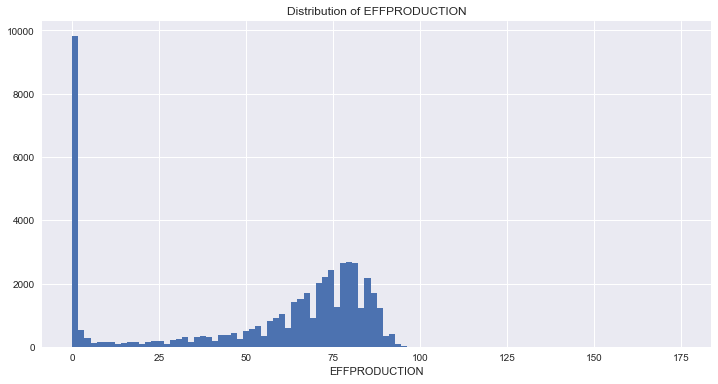

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_new.loc[:, 'EFFPRODUCTION'], 100)
plt.title('Distribution of EFFPRODUCTION')  
plt.xlabel('EFFPRODUCTION')  
plt.show()

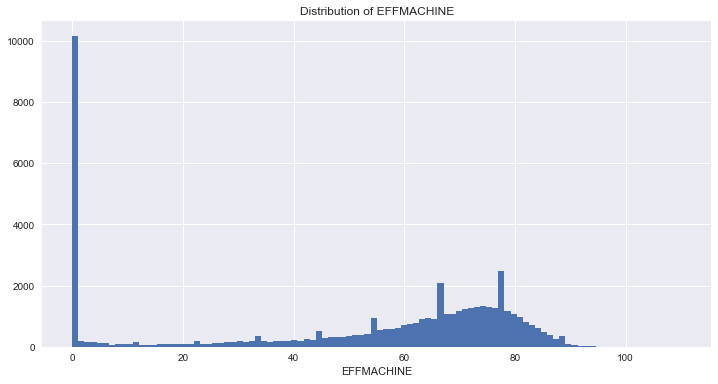

In [15]:
plt.figure(figsize=(12, 6))
plt.hist(tb_20_new.loc[:, 'EFFMACHINE'], 100)
plt.title('Distribution of EFFMACHINE')  
plt.xlabel('EFFMACHINE')  
plt.show()

## 表22  MT_DC_PM_MP_PT102DATA_CUR  卷接机生产数据

In [16]:
tb_22_new = tb_22[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'TOTALPRODUCTION', 'FILTERTIP',
                   'TOTALWASTE', 'TOTALWASTEPCT', 'EFFMACHINE', 'EFFPRODUCTION', 'MACHINESPEED', 'RUNTIME',
                   'TOTALSTOPTIME', 'TOTALSTOPCNT']]
tb_22_new.head()

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
0,2015-11-13,1,115,10001586,2015-11-13 15:59:59,2,742,2377,0.09,97.1,97.1,7196,28980,2160,34
1,2015-11-13,1,102,10001586,2015-11-13 16:00:02,2,680,5643,0.19,90.4,90.4,7246,27720,3420,37
2,2015-11-13,1,113,10001586,2015-11-13 15:59:58,3,813,16812,0.59,96.8,103.7,7269,29700,1440,22
3,2015-11-13,1,101,10001586,2015-11-13 16:00:08,3,784,26052,0.86,102.4,102.4,0,28980,2160,12
4,2015-11-13,1,119,10001586,2015-11-13 16:01:06,0,0,1574,0.43,5.8,8.2,6738,2880,28260,26


In [17]:
tb_22_clear = tb_22_new.query('TOTALPRODUCTION < 1000000 & FILTERTIP < 1500000 & TOTALWASTE > 0 & RUNTIME > 0 & TOTALSTOPTIME > 0')

### 单台设备生产数据

In [18]:
tb22_dt = tb_22_clear.query("PM_MP_MACHINE_ID == '101'").sort_values('GATHERDATETIME')
tb22_dt

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
191,2015-11-11,1,101,10001586,2015-11-11 15:59:56,2,598,24686,1.03,77.9,82.0,6946,25440,5700,36
209,2015-11-11,2,101,10001586,2015-11-11 23:58:01,2,750,23268,0.82,98.4,98.4,0,25920,2700,25
228,2015-11-11,3,101,10001586,2015-11-12 00:05:45,2,750,23268,0.82,98.0,98.0,0,25920,2820,25
235,2015-11-11,3,101,10001586,2015-11-12 04:08:23,1,354,17642,1.24,94.0,94.0,7230,12900,1980,32
236,2015-11-11,3,101,10001586,2015-11-12 04:27:25,1,389,18346,1.18,94.7,94.7,7232,14040,1980,32
237,2015-11-11,3,101,10001586,2015-11-12 07:21:34,2,644,30463,1.19,90.3,90.3,0,22620,3660,57
248,2015-11-12,1,101,10001586,2015-11-12 16:00:02,2,713,25907,0.91,92.9,92.9,0,27720,3240,33
262,2015-11-12,2,101,10001586,2015-11-12 17:12:05,0,87,2870,0.83,80.0,80.0,6245,3840,420,3
273,2015-11-12,2,101,10001586,2015-11-13 00:00:04,2,688,26577,0.97,89.6,89.6,0,24360,4380,37
291,2015-11-12,3,101,10001586,2015-11-13 07:20:05,2,647,16394,0.63,90.8,90.8,0,23460,2880,11


### 单台设备生产数据相关系数

In [19]:
tb22_dt_corr = tb22_dt[['TOTALPRODUCTION', 'FILTERTIP', 'TOTALWASTE', 'TOTALWASTEPCT', 'EFFMACHINE', 'EFFPRODUCTION', 'RUNTIME', 'TOTALSTOPTIME', 'TOTALSTOPCNT']].corr()
tb22_dt_corr

,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
TOTALPRODUCTION,1.000000,0.568851,0.095845,-0.193806,0.291173,0.284685,0.536205,-0.029629,0.208178
FILTERTIP,0.568851,1.000000,0.031789,-0.121836,0.153270,0.141900,0.225621,-0.024113,0.146631
TOTALWASTE,0.095845,0.031789,1.000000,0.207082,-0.031083,-0.012679,0.296139,0.273498,0.459142
TOTALWASTEPCT,-0.193806,-0.121836,0.207082,1.000000,-0.432694,-0.446625,-0.345142,0.199505,-0.024799
EFFMACHINE,0.291173,0.153270,-0.031083,-0.432694,1.000000,0.954685,0.627200,-0.638195,-0.046720
EFFPRODUCTION,0.284685,0.141900,-0.012679,-0.446625,0.954685,1.000000,0.604495,-0.572927,-0.063483
RUNTIME,0.536205,0.225621,0.296139,-0.345142,0.627200,0.604495,1.000000,-0.102440,0.371246
TOTALSTOPTIME,-0.029629,-0.024113,0.273498,0.199505,-0.638195,-0.572927,-0.102440,1.000000,0.407109
TOTALSTOPCNT,0.208178,0.146631,0.459142,-0.024799,-0.046720,-0.063483,0.371246,0.407109,1.000000


In [20]:
columns = ['TOTALPRODUCTION', 'FILTERTIP', 'TOTALWASTE', 'TOTALWASTEPCT', 'EFFMACHINE', 'EFFPRODUCTION', 'RUNTIME', 'TOTALSTOPTIME', 'TOTALSTOPCNT']

for col in columns:
    print('*' * 50)
    print(col, '相关系数排行：\n', tb22_dt_corr[col].sort_values(ascending=False)[:5])

**************************************************
TOTALPRODUCTION 相关系数排行：
 TOTALPRODUCTION    1.000000
FILTERTIP          0.568851
RUNTIME            0.536205
EFFMACHINE         0.291173
EFFPRODUCTION      0.284685
Name: TOTALPRODUCTION, dtype: float64
**************************************************
FILTERTIP 相关系数排行：
 FILTERTIP          1.000000
TOTALPRODUCTION    0.568851
RUNTIME            0.225621
EFFMACHINE         0.153270
TOTALSTOPCNT       0.146631
Name: FILTERTIP, dtype: float64
**************************************************
TOTALWASTE 相关系数排行：
 TOTALWASTE       1.000000
TOTALSTOPCNT     0.459142
RUNTIME          0.296139
TOTALSTOPTIME    0.273498
TOTALWASTEPCT    0.207082
Name: TOTALWASTE, dtype: float64
**************************************************
TOTALWASTEPCT 相关系数排行：
 TOTALWASTEPCT    1.000000
TOTALWASTE       0.207082
TOTALSTOPTIME    0.199505
TOTALSTOPCNT    -0.024799
FILTERTIP       -0.121836
Name: TOTALWASTEPCT, dtype: float64
******************************

### 原始数据绘图

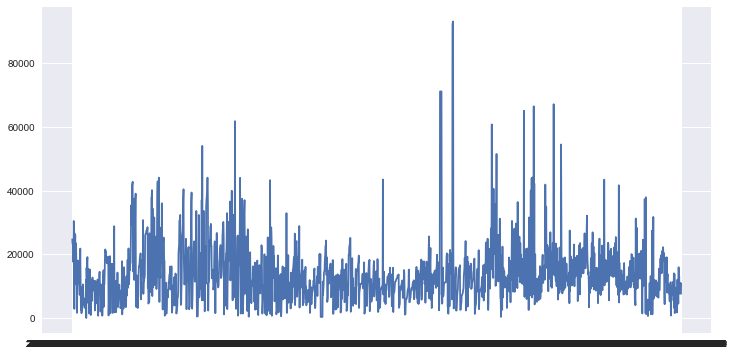

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt['GATHERDATETIME'], tb22_dt['TOTALWASTE'])
plt.show()

### 一阶差分后的数据绘图

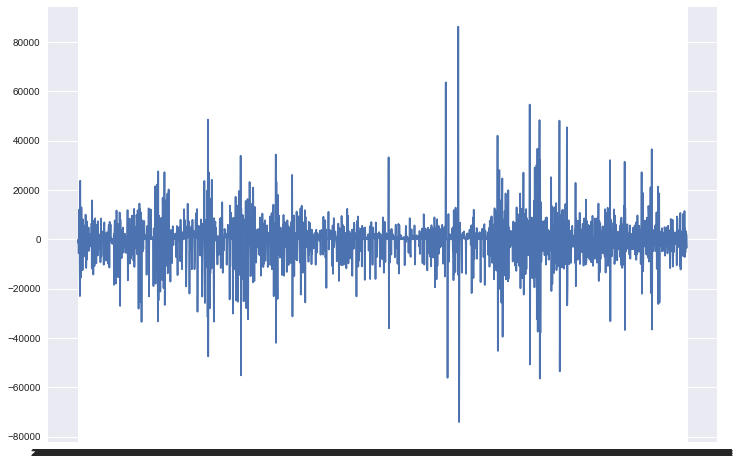

In [22]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = tb22_dt['TOTALWASTE'].diff(1)
plt.plot(tb22_dt['GATHERDATETIME'], diff1)
plt.show()

### 观察是否符合正态分布

这里使用QQ图，它用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布。在教学和软件中常用的是检验数据是否来自于正态分布。

### 单台设备有生产数据的天数

In [23]:
tb22_dt.groupby('PRODUCEDATE').size()

PRODUCEDATE
2003-12-31     2
2015-11-11     6
2015-11-12     4
2015-11-13     4
2015-11-14     5
2015-11-15     1
2015-11-16     3
2015-11-17     3
2015-11-26     3
2015-11-27     7
2015-11-28     3
2015-11-29     4
2015-11-30     2
2015-12-01     5
2015-12-02     2
2015-12-03     5
2015-12-04     8
2015-12-05     8
2015-12-06     1
2015-12-07    11
2015-12-08     6
2015-12-09     8
2015-12-10    11
2015-12-11     4
2015-12-12    12
2015-12-14     5
2015-12-15     6
2015-12-16     5
2015-12-17     3
2015-12-18     7
              ..
2017-06-10     3
2017-06-12     2
2017-06-13     3
2017-06-14     3
2017-06-15     3
2017-06-16     2
2017-06-26     1
2017-06-27     3
2017-06-28     2
2017-07-04     2
2017-07-05     3
2017-07-06     3
2017-07-07     3
2017-07-08     3
2017-07-10     2
2017-07-11     3
2017-07-12     3
2017-07-13     3
2017-07-14     2
2017-07-15     3
2017-07-17     2
2017-07-18     3
2017-07-19     3
2017-07-20     2
2017-07-21     2
2017-07-24     2
2017-07-25     2
20

设备101在2016-05-25生产数据：

In [24]:
dt_oneday = tb22_dt.query("PRODUCEDATE == '2016-05-25'")
dt_oneday

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
9506,2016-05-25,3,101,10001586,2016-05-25 07:16:28,1490,376456,15397,1.00,42.4,49.2,0,14400,11880,45
7245,2016-05-25,1,101,10001586,2016-05-25 09:41:35,455,114929,4376,0.94,54.1,61.9,6279,4620,1680,12
7250,2016-05-25,1,101,10001586,2016-05-25 12:36:04,1325,333722,9814,0.71,59.2,67.7,6280,13080,3660,24
7253,2016-05-25,1,101,10001586,2016-05-25 12:47:24,1395,351424,10142,0.70,59.9,68.5,6281,13740,3660,24
7254,2016-05-25,1,101,10001586,2016-05-25 14:05:07,1494,377593,14827,0.79,50.7,57.9,801,14940,7140,49
7377,2016-05-25,1,101,10001586,2016-05-25 14:05:09,1494,377593,14827,0.79,50.7,57.9,22,14940,7140,49
7378,2016-05-25,1,101,10001586,2016-05-25 14:07:51,1498,378784,15476,0.89,50.4,57.6,5445,15000,7260,50
7379,2016-05-25,1,101,10001586,2016-05-25 14:11:20,1519,383958,15498,0.96,50.6,57.9,5944,15180,7260,50
7380,2016-05-25,1,101,10001586,2016-05-25 14:42:09,1580,399751,16989,1.01,48.7,55.6,6278,15840,8460,55
7381,2016-05-25,1,101,10001586,2016-05-25 14:53:31,1637,414065,17513,1.00,49.1,56.1,6276,16440,8580,56


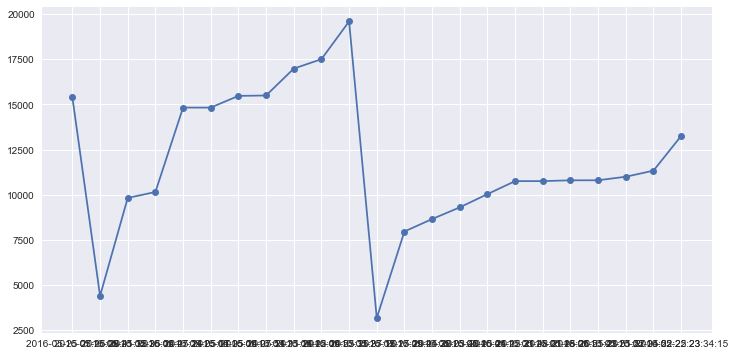

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(dt_oneday['GATHERDATETIME'], dt_oneday['TOTALWASTE'], 'o-')
plt.show()

### 设备101早班生产数据

In [26]:
tb22_dt1 = tb_22_clear.query("PB_SHIFT_ID == 1 & PM_MP_MACHINE_ID == '101'").sort_values('GATHERDATETIME')
tb22_dt1

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
191,2015-11-11,1,101,10001586,2015-11-11 15:59:56,2,598,24686,1.03,77.9,82.0,6946,25440,5700,36
248,2015-11-12,1,101,10001586,2015-11-12 16:00:02,2,713,25907,0.91,92.9,92.9,0,27720,3240,33
3,2015-11-13,1,101,10001586,2015-11-13 16:00:08,3,784,26052,0.86,102.4,102.4,0,28980,2160,12
60,2015-11-14,1,101,10001586,2015-11-14 15:52:32,2,693,15650,0.57,92.2,99.4,7229,27660,3060,24
679,2015-11-15,1,101,10001586,2015-11-15 15:54:10,2,678,18077,0.64,90.0,92.9,0,26160,4620,17
767,2015-11-17,1,101,10001586,2015-11-17 15:59:10,2,687,10858,0.39,90.1,90.1,7230,25800,5280,17
856,2015-11-27,1,101,10001586,2015-11-27 08:34:54,0,59,1501,0.64,39.5,54.4,7212,2100,2400,6
871,2015-11-27,1,101,10001586,2015-11-27 09:39:09,0,175,2225,0.32,62.6,78.8,7210,5940,2400,6
872,2015-11-27,1,101,10001586,2015-11-27 11:58:47,1,368,3635,0.25,65.9,78.9,7140,13380,3360,8
875,2015-11-27,1,101,10001586,2015-11-27 14:56:46,2,555,5528,0.25,60.6,71.4,6041,20520,6900,13


In [27]:
tb22_dt1.describe()

,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,807.0,807.0,807.0,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,1.0,101.0,10001586.0,807.391574,119880.811648,15459.639405,2.030223,50.139157,60.091450,3261.009913,14276.133829,7293.159851,21.802974
std,0.0,0.0,0.0,960.147842,199052.471349,10068.573414,4.877216,17.515542,18.458187,3168.845213,7502.243233,5677.514817,12.649487
min,1.0,101.0,10001586.0,0.000000,0.000000,14.000000,0.000000,0.000000,-0.200000,0.000000,60.000000,60.000000,1.000000
25%,1.0,101.0,10001586.0,1.000000,202.500000,9185.000000,0.670000,42.600000,53.050000,0.000000,7200.000000,3450.000000,13.000000
50%,1.0,101.0,10001586.0,63.000000,528.000000,13829.000000,0.890000,53.300000,63.300000,4912.000000,15960.000000,6300.000000,20.000000
75%,1.0,101.0,10001586.0,1760.000000,190304.500000,19196.000000,1.430000,61.500000,71.400000,6345.500000,20520.000000,9000.000000,28.000000
max,1.0,101.0,10001586.0,2890.000000,726889.000000,93095.000000,75.720000,102.400000,102.400000,7243.000000,28980.000000,28140.000000,110.000000


### 设备101中班生产数据

In [28]:
tb22_dt2 = tb_22_clear.query("PB_SHIFT_ID == 2 & PM_MP_MACHINE_ID == '101'").sort_values('GATHERDATETIME')
tb22_dt2

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
209,2015-11-11,2,101,10001586,2015-11-11 23:58:01,2,750,23268,0.82,98.4,98.4,0,25920,2700,25
262,2015-11-12,2,101,10001586,2015-11-12 17:12:05,0,87,2870,0.83,80.0,80.0,6245,3840,420,3
273,2015-11-12,2,101,10001586,2015-11-13 00:00:04,2,688,26577,0.97,89.6,89.6,0,24360,4380,37
19,2015-11-13,2,101,10001586,2015-11-13 19:24:15,1,325,10568,0.91,116.0,116.0,6612,11580,600,6
28,2015-11-13,2,101,10001586,2015-11-14 00:00:09,3,779,23502,0.79,101.8,101.8,0,26940,1800,15
146,2015-11-14,2,101,10001586,2015-11-15 00:00:15,2,632,14127,0.56,82.7,88.9,7242,22080,6660,24
738,2015-11-16,2,101,10001586,2015-11-16 22:13:34,2,578,11104,0.48,99.9,99.9,7230,20340,2040,17
742,2015-11-16,2,101,10001586,2015-11-17 00:00:06,3,764,13060,0.43,99.9,99.9,0,26520,2220,18
430,2015-11-17,2,101,10001586,2015-11-17 16:05:51,2,688,10865,0.39,90.1,90.1,7231,25860,5280,17
434,2015-11-17,2,101,10001586,2015-11-17 20:36:41,1,321,7262,0.66,78.7,78.7,7229,12840,3720,18


In [29]:
tb22_dt2.describe()

,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,691.0,691.0,691.0,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,2.0,101.0,10001586.0,999.518090,146796.267728,11701.043415,1.204573,52.395948,62.096671,2963.665702,15479.479016,6597.916064,19.726483
std,0.0,0.0,0.0,1026.819961,218617.515200,7455.749488,2.143804,18.678774,19.391696,3146.116469,7770.522208,4929.036858,11.579048
min,2.0,101.0,10001586.0,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,60.000000,180.000000,1.000000
25%,2.0,101.0,10001586.0,1.000000,209.500000,7374.000000,0.500000,43.500000,54.450000,0.000000,9540.000000,3330.000000,11.500000
50%,2.0,101.0,10001586.0,690.000000,629.000000,10746.000000,0.660000,56.800000,66.300000,0.000000,17760.000000,5640.000000,18.000000
75%,2.0,101.0,10001586.0,2047.000000,328656.000000,14858.500000,0.930000,64.300000,73.800000,6251.000000,21960.000000,8430.000000,26.000000
max,2.0,101.0,10001586.0,2850.000000,716274.000000,67131.000000,21.730000,116.000000,116.000000,7242.000000,26940.000000,28200.000000,89.000000


### 设备101夜班生产数据

In [30]:
tb22_dt3 = tb_22_clear.query("PB_SHIFT_ID == 3 & PM_MP_MACHINE_ID == '101'").sort_values('GATHERDATETIME')
tb22_dt3

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
228,2015-11-11,3,101,10001586,2015-11-12 00:05:45,2,750,23268,0.82,98.0,98.0,0,25920,2820,25
235,2015-11-11,3,101,10001586,2015-11-12 04:08:23,1,354,17642,1.24,94.0,94.0,7230,12900,1980,32
236,2015-11-11,3,101,10001586,2015-11-12 04:27:25,1,389,18346,1.18,94.7,94.7,7232,14040,1980,32
237,2015-11-11,3,101,10001586,2015-11-12 07:21:34,2,644,30463,1.19,90.3,90.3,0,22620,3660,57
291,2015-11-12,3,101,10001586,2015-11-13 07:20:05,2,647,16394,0.63,90.8,90.8,0,23460,2880,11
45,2015-11-13,3,101,10001586,2015-11-14 07:01:58,2,667,22451,0.84,97.8,97.8,7233,22800,2460,13
172,2015-11-14,3,101,10001586,2015-11-15 00:56:51,0,69,1620,0.58,84.9,84.9,7237,2940,420,4
176,2015-11-14,3,101,10001586,2015-11-15 05:16:52,2,517,9635,0.47,104.6,104.6,7237,17880,1080,10
182,2015-11-14,3,101,10001586,2015-11-15 07:20:17,2,708,12267,0.43,99.6,99.6,0,24180,2160,13
753,2015-11-16,3,101,10001586,2015-11-17 07:20:07,2,703,14024,0.50,98.6,98.6,7233,24480,1860,18


In [31]:
tb22_dt3.describe()

,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,TOTALPRODUCTION,FILTERTIP,TOTALWASTE,TOTALWASTEPCT,EFFMACHINE,EFFPRODUCTION,MACHINESPEED,RUNTIME,TOTALSTOPTIME,TOTALSTOPCNT
count,550.0,550.0,550.0,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,3.0,101.0,10001586.0,1005.720000,126674.920000,13193.940000,1.262909,54.277636,63.049455,2571.361818,15553.309091,6063.381818,18.985455
std,0.0,0.0,0.0,1023.346032,203915.387962,9779.798372,2.956093,18.613646,20.745401,3141.060311,7671.860842,4636.025186,10.126512
min,3.0,101.0,10001586.0,0.000000,0.000000,474.000000,0.000000,0.000000,-98.600000,0.000000,120.000000,60.000000,1.000000
25%,3.0,101.0,10001586.0,1.000000,168.000000,7651.000000,0.520000,47.875000,56.125000,0.000000,10170.000000,2880.000000,13.000000
50%,3.0,101.0,10001586.0,717.500000,522.000000,11503.000000,0.670000,57.250000,66.700000,0.000000,17760.000000,5220.000000,18.000000
75%,3.0,101.0,10001586.0,2048.250000,242133.500000,16002.000000,0.960000,65.100000,75.000000,6278.750000,21300.000000,7560.000000,25.000000
max,3.0,101.0,10001586.0,2950.000000,683516.000000,71125.000000,51.400000,104.600000,104.600000,7237.000000,50040.000000,27000.000000,65.000000


由三个班次的基本统计量可见，早班废品总量和废品率均最高，中班最低。

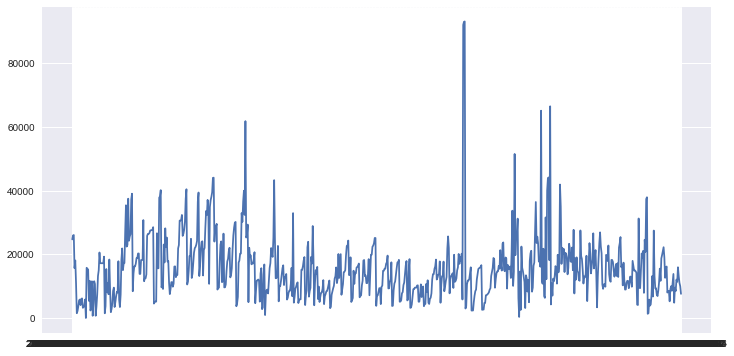

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt1['GATHERDATETIME'], tb22_dt1['TOTALWASTE'])
plt.show()

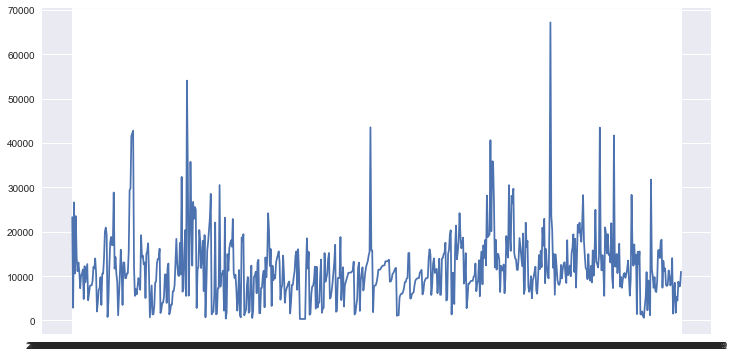

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt2['GATHERDATETIME'], tb22_dt2['TOTALWASTE'])
plt.show()

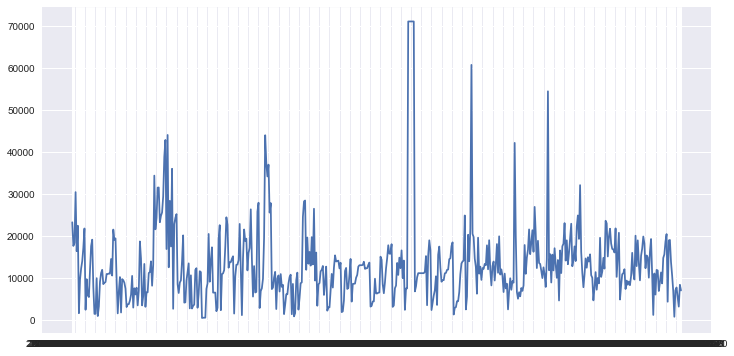

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(tb22_dt3['GATHERDATETIME'], tb22_dt3['TOTALWASTE'])
plt.show()

## 表46、47  TEST_DATA  检测数据

In [35]:
tb_46_new = tb_46[['MACH_ID', 'TEST_ID', 'WEIGHT_VALUE', 'CIRCLE_VALUE', 'LENGTH_VALUE', 'PD_VALUE']]
tb_46_new.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983


In [36]:
tb_47_new = tb_47[['MACH_ID', 'TEST_ID', 'SAMPLE_NAME', 'LINE_NAME']]
tb_47_new.head()

,MACH_ID,TEST_ID,SAMPLE_NAME,LINE_NAME
0,test5,2015-09-30 08:23:12,利群（新版）,15.0
1,test5,2015-09-30 08:36:33,利群（新版）,13.0
2,test5,2015-10-05 18:11:39,利群（新版）,13.0
3,test5,2015-10-05 18:28:22,真龙（珍品）,16.0
4,test5,2015-10-05 19:24:29,利群（新版）,13.0


In [37]:
droped = tb_46_new[(tb_46_new['WEIGHT_VALUE'] <= 0) | (tb_46_new['CIRCLE_VALUE'] <= 0) | 
                   (tb_46_new['LENGTH_VALUE'] <= 0) | (tb_46_new['PD_VALUE'] <= 0) | 
                  (tb_46_new['WEIGHT_VALUE'] > 10) | (tb_46_new['CIRCLE_VALUE'] > 100) | 
                   (tb_46_new['LENGTH_VALUE'] > 100) | (tb_46_new['PD_VALUE'] > 10)]

In [38]:
tb_46_clear = tb_46_new.append(droped).drop_duplicates(keep=False)
tb_46_clear.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983


In [39]:
tb_46_mg = pd.merge(tb_46_clear, tb_47_new, how='left')
tb_46_mg.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685,真龙(凌云)1401,6.0
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758,真龙(凌云)1401,6.0
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607,真龙(凌云)1401,6.0
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378,真龙(凌云)1401,6.0
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983,真龙(凌云)1401,6.0


### 品牌质量数据样本数排行

In [40]:
tb_46_mg.groupby('SAMPLE_NAME').size().sort_values(ascending=False)

SAMPLE_NAME
利群（新版）          423768
利群[新版]          234557
利群(新版)          154889
真龙（珍品）          115336
真龙(珍品)           88103
真龙(软娇子)1601      87748
真龙（娇子）1502       74963
真龙(凌云)1501       57999
真龙(鸿韵)1501       43825
真龙(凌云)1401       42629
真龙（娇子)1502       34933
大红鹰(软蓝)          32364
雄狮（硬）            28338
真龙（娇子）1501       26559
真龙(软娇子)          24750
利群(无硬度)          24079
雄狮[硬]            23188
真龙（轩云）           15149
大红鷹(軟蓝)沒硬度       13929
真龙(娇子)           13208
真龙[软娇子]1401      12547
真龙（娇子)           10915
雄狮(硬）            10523
真龙（软娇子）1601       9165
雄狮红               8820
真龙（娇子）            8275
真龙珍品              8206
真龙(燃情时光)1401      7257
真龙（天翔）1501        6615
真龙(娇子)1502        5665
                 ...  
dahongying         175
清云                 170
真龙[起源]             150
真龙壮丽               141
龙行天下1701           140
hy                 140
比对棒0010            135
zl                 112
真龙（真男儿）            110
甲天下（山水）            100
溯源比对棒0008           90
溯源比对棒               89

### 真龙(珍品)质量数据

In [41]:
zlzp = tb_46_mg.query("SAMPLE_NAME == '真龙(珍品)'")
zlzp

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME
649114,test1,2016-03-22 10:36:501210GD093,0.903,24.570927,84.076599,1.143278,真龙(珍品),17.0
649141,test1,2016-03-22 12:57:281210GD093,0.929,24.564024,84.391205,1.266163,真龙(珍品),17.0
649142,test1,2016-03-22 12:57:281210GD093,0.874,24.488245,84.061005,1.112823,真龙(珍品),17.0
649143,test1,2016-03-22 12:57:281210GD093,0.893,24.517584,83.802902,1.116029,真龙(珍品),17.0
649144,test1,2016-03-22 12:57:281210GD093,0.890,24.582537,83.888702,1.060597,真龙(珍品),17.0
649145,test1,2016-03-22 12:57:281210GD093,0.895,24.575634,83.896103,1.112957,真龙(珍品),17.0
649146,test1,2016-03-22 12:57:281210GD093,0.885,24.510525,84.055000,1.133928,真龙(珍品),17.0
649147,test1,2016-03-22 12:57:281210GD093,0.912,24.558218,84.176804,1.227828,真龙(珍品),17.0
649148,test1,2016-03-22 12:57:281210GD093,0.857,24.489029,83.834404,1.092788,真龙(珍品),17.0
649149,test1,2016-03-22 12:57:281210GD093,0.896,24.607168,84.089302,1.169992,真龙(珍品),17.0


In [42]:
zlzp.describe()

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,LINE_NAME
count,88103.000000,88103.000000,88103.000000,88103.000000,88103.000000
mean,0.904876,24.521063,84.006629,1.140775,15.090621
std,0.020866,0.116173,0.367656,0.046811,4.932293
min,0.376000,24.132250,62.663605,0.001672,1.000000
25%,0.891000,24.478706,83.868050,1.110706,16.000000
50%,0.905000,24.519913,83.986496,1.140372,17.000000
75%,0.919000,24.561422,84.115303,1.170314,17.000000
max,1.101000,47.129547,96.471001,1.606294,24.000000


In [43]:
zlzp_mean = zlzp.groupby('TEST_ID').mean()
zlzp_mean

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,LINE_NAME
TEST_ID,,,,,
2016-03-22 10:36:501210GD093,0.901650,24.556963,84.184377,1.174340,17.0
2016-03-22 12:57:281210GD093,0.894850,24.545448,84.043353,1.145796,17.0
2016-03-22 22:48:041210GD093,0.901550,24.522910,84.260387,1.124746,16.0
2016-03-23 12:58:261210GD093,0.896750,24.498286,84.260724,1.137074,14.0
2016-03-23 14:02:181210GD093,0.909700,24.594742,83.977563,1.146764,16.0
2016-03-23 16:32:241210GD093,0.907350,24.471828,84.053247,1.207730,18.0
2016-03-23 16:41:471210GD093,0.908238,24.537195,84.232760,1.149859,16.0
2016-03-24 01:13:451210GD093,0.898600,24.560854,84.149988,1.149827,17.0
2016-03-24 03:10:001210GD093,0.897450,24.523122,84.141217,1.164490,17.0


### 判断数据集是否属于正态分布

In [44]:
from scipy import stats

x = zlzp_mean['WEIGHT_VALUE']
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # 零假设: x来自正态分布
    print("零假设能被拒绝")
else:
    print("零假设不能被拒绝")

p = 2.19018e-201
零假设能被拒绝


In [45]:
stats.kstest(x, cdf='norm')

KstestResult(statistic=0.80714571076155472, pvalue=0.0)

/Users/jing/.virtualenvs/pydata/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


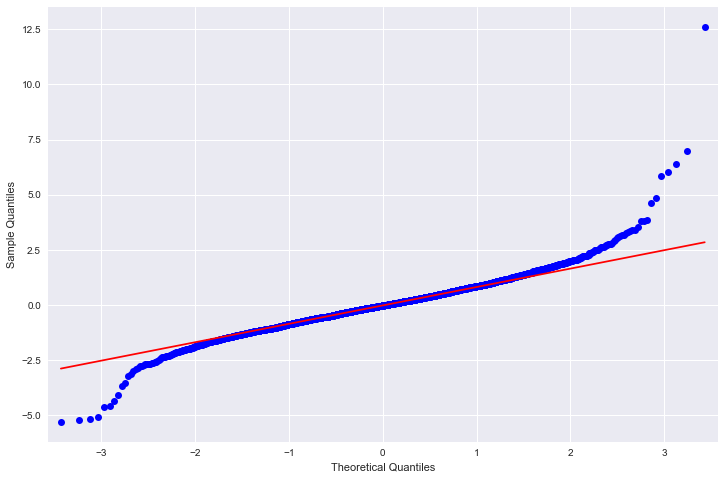

In [46]:
from statsmodels.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(x, line='q', ax=ax, fit=True)

### 基于3sigma的异常数据预警代码


异常数据如下：

[ 0.862  0.862  0.866  0.963  1.01   0.861  0.869  0.879  0.937  0.878
  0.931  0.943  0.934  0.876  0.945  0.933  0.933  0.933  0.93   0.932
  0.931  0.867  0.931  0.871  0.937  0.953  0.958  0.937  0.931  0.874
  0.932  0.955  0.863]
['2016-04-21 18:30:241210GD093', '2016-07-05 00:47:591210GD093', '2016-07-23 09:51:221210GD093', '2016-08-01 08:09:471210GD093', '2016-08-04 22:42:491210GD093', '2016-08-09 02:36:401210GD093', '2016-08-11 10:20:081210GD093', '2016-08-18 15:13:361210GD093', '2017-05-03 16:03:521210GD093', '2017-05-03 19:49:041210GD093', '2017-05-04 07:42:341210GD093', '2017-05-07 01:01:201210GD093', '2017-05-08 07:43:411210GD093', '2017-05-08 11:07:061210GD093', '2017-05-08 16:06:571210GD093', '2017-05-11 09:00:101210GD093', '2017-05-22 17:01:381210GD093', '2017-05-26 08:55:451210GD093', '2017-05-26 16:12:451210GD093', '2017-05-26 16:27:351210GD093', '2017-05-26 16:48:011210GD093', '2017-05-27 17:07:481210GD093', '2017-05-28 18:39:201210GD093', '2017-06-02 01:18

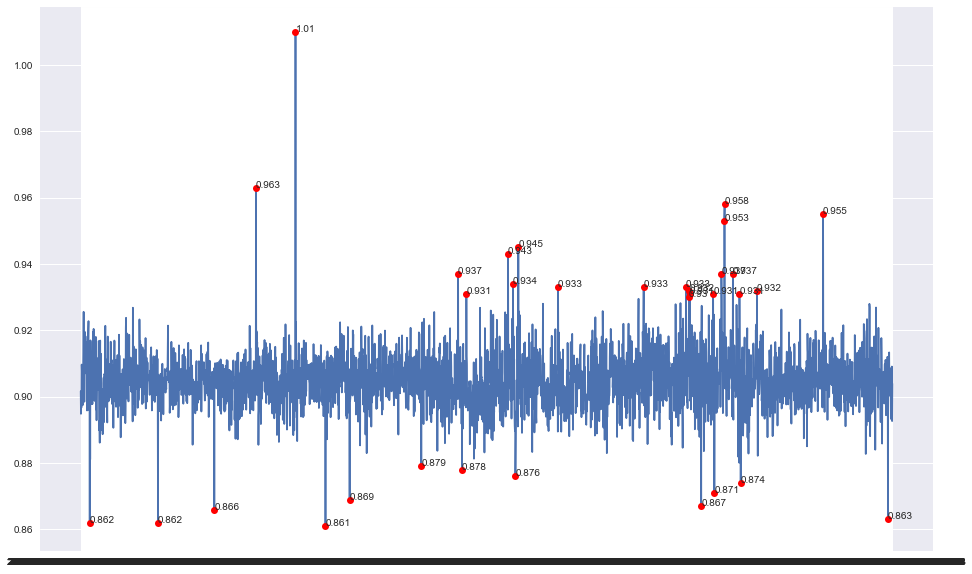

In [47]:
n = 3
data_x = zlzp_mean[['WEIGHT_VALUE']].index
data_y = zlzp_mean['WEIGHT_VALUE']
ymean = np.mean(data_y)
ystd = np.std(data_y)
threshold1 = ymean - n * ystd
threshold2 = ymean + n * ystd

outlier = [] #将异常值保存
outlier_x = []

for i in range(0, len(data_y)):
    if (data_y[i] < threshold1)|(data_y[i] > threshold2):
        outlier.append(data_y[i])
        outlier_x.append(data_x[i])
    else:
        continue

outlier = np.round(outlier, 3)

print('\n异常数据如下：\n')
print(outlier)
print(outlier_x)

plt.figure(figsize=(16, 10))
plt.plot(data_x, data_y)
plt.plot(outlier_x, outlier, 'ro')
for j in range(len(outlier)):
    plt.annotate(outlier[j], xy=(outlier_x[j], outlier[j]), xytext=(outlier_x[j],outlier[j]))
plt.show()

### 基于箱型图的异常数据预警代码


异常数据如下：

[ 0.926  0.862  0.881  0.886  0.924  0.927  0.862  0.886  0.866  0.963
  0.885  1.01   0.861  0.869  0.885  0.883  0.879  0.924  0.926  0.884
  0.886  0.937  0.878  0.931  0.886  0.881  0.884  0.927  0.883  0.926
  0.925  0.925  0.925  0.943  0.924  0.934  0.876  0.883  0.945  0.926
  0.925  0.883  0.928  0.933  0.924  0.926  0.883  0.93   0.926  0.933
  0.886  0.886  0.928  0.928  0.885  0.924  0.933  0.93   0.932  0.931
  0.867  0.927  0.884  0.925  0.931  0.925  0.871  0.937  0.929  0.953
  0.958  0.937  0.928  0.882  0.88   0.931  0.874  0.883  0.932  0.882
  0.926  0.885  0.955  0.883  0.928  0.927  0.884  0.927  0.886  0.863]
['2016-03-24 15:13:311210GD093', '2016-04-21 18:30:241210GD093', '2016-04-27 08:12:581210GD093', '2016-06-01 17:32:161210GD093', '2016-06-25 08:58:061210GD093', '2016-06-29 04:06:201210GD093', '2016-07-05 00:47:591210GD093', '2016-07-18 09:14:071210GD093', '2016-07-23 09:51:221210GD093', '2016-08-01 08:09:471210GD093', '2016-08-01 14:15:191210GD093

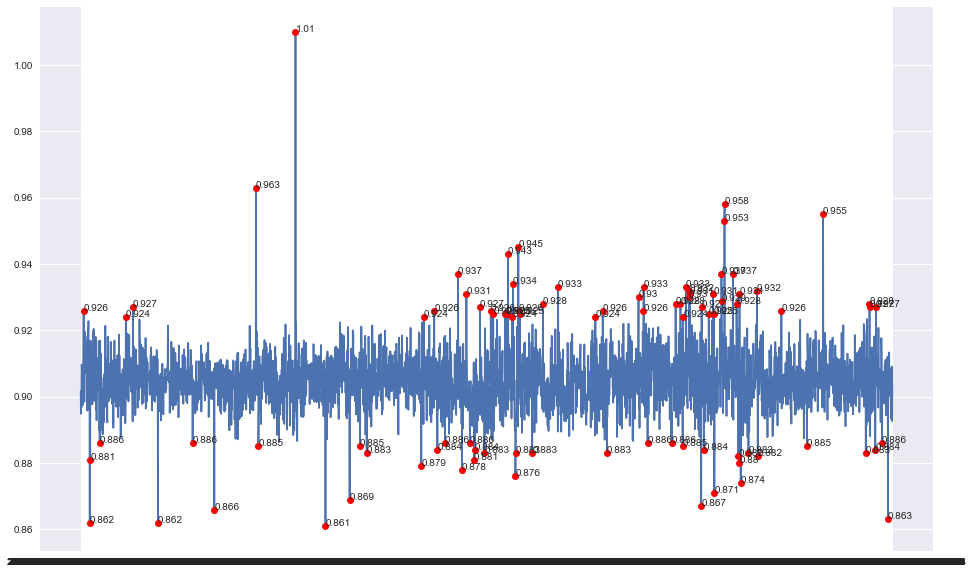

In [48]:
data_y = zlzp_mean['WEIGHT_VALUE']
data_x = zlzp_mean[['WEIGHT_VALUE']].index

statistics = data_y.describe() #保存基本统计量
IQR = statistics.loc['75%']-statistics.loc['25%']   #四分位数间距
QL = statistics.loc['25%']  #下四分位数
QU = statistics.loc['75%']  #上四分位数
threshold1 = QL - 1.5 * IQR #下阈值
threshold2 = QU + 1.5 * IQR #上阈值
outlier = [] #将异常值保存
outlier_x = []

for i in range(0, len(data_y)):
    if (data_y[i] < threshold1)|(data_y[i] > threshold2):
        outlier.append(data_y[i])
        outlier_x.append(data_x[i])
    else:
        continue

outlier = np.round(outlier, 3)

print('\n异常数据如下：\n')
print(outlier)
print(outlier_x)

plt.figure(figsize=(16, 10))
plt.plot(data_x, data_y)
plt.plot(outlier_x, outlier, 'ro')
for j in range(len(outlier)):
    plt.annotate(outlier[j], xy=(outlier_x[j], outlier[j]), xytext=(outlier_x[j],outlier[j]))
plt.show()

### 将质量数据和设备ID关联起来

In [49]:
machine = pd.read_csv('MT_PB_MACHINE.csv')[['PM_MP_MACHINE_ID', 'DC_PB_MACHINEGROUPID']]
machine.rename(columns={'DC_PB_MACHINEGROUPID':'LINE_NAME'}, inplace=True)
machine = machine.query('PM_MP_MACHINE_ID < 200') # 只选卷接机设备
machine.head()

,PM_MP_MACHINE_ID,LINE_NAME
6,121,21
7,122,22
8,123,23
9,124,24
15,125,24


In [50]:
tb46 = pd.merge(tb_46_mg, machine, how='left')
tb46.head()

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME,PM_MP_MACHINE_ID
0,test1,2015-10-28 09:16:45OM-VA,0.528,17.045092,97.210899,1.793685,真龙(凌云)1401,6,106.0
1,test1,2015-10-28 09:16:45OM-VA,0.543,17.025764,97.003197,1.808758,真龙(凌云)1401,6,106.0
2,test1,2015-10-28 09:16:45OM-VA,0.540,16.983648,96.938400,1.862607,真龙(凌云)1401,6,106.0
3,test1,2015-10-28 09:16:45OM-VA,0.517,16.937761,96.846497,1.824378,真龙(凌云)1401,6,106.0
4,test1,2015-10-28 09:26:22OM-VA,0.571,16.995275,97.066200,1.940983,真龙(凌云)1401,6,106.0


### 选取设备101的质量数据进行分析

In [51]:
tb46_dt = tb46.query("PM_MP_MACHINE_ID == 101").sort_values('TEST_ID')
tb46_dt

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME,PM_MP_MACHINE_ID
54067,test2,2012-08-18 11:59:28,0.895,24.555124,83.848297,1.164382,真龙（娇子）,1,101.0
54075,test2,2012-08-18 11:59:28,0.886,24.534843,83.784195,1.173639,真龙（娇子）,1,101.0
54074,test2,2012-08-18 11:59:28,0.882,24.489883,83.954697,1.211988,真龙（娇子）,1,101.0
54073,test2,2012-08-18 11:59:28,0.906,24.471333,84.230797,1.251660,真龙（娇子）,1,101.0
54072,test2,2012-08-18 11:59:28,0.882,24.503874,83.559998,1.098263,真龙（娇子）,1,101.0
54071,test2,2012-08-18 11:59:28,0.911,24.518337,83.962296,1.184218,真龙（娇子）,1,101.0
54070,test2,2012-08-18 11:59:28,0.933,24.601656,83.880600,1.196120,真龙（娇子）,1,101.0
54069,test2,2012-08-18 11:59:28,0.913,24.602127,84.010101,1.215955,真龙（娇子）,1,101.0
54068,test2,2012-08-18 11:59:28,0.905,24.603857,83.598099,1.194797,真龙（娇子）,1,101.0
59524,test2,2012-08-18 11:59:28,0.882,24.536259,83.682602,1.135290,真龙（娇子）,1,101.0


设备101生产的所有品牌：

In [52]:
tb46_dt.groupby('SAMPLE_NAME').size().sort_values(ascending=False)

SAMPLE_NAME
大红鹰(软蓝)            10258
真龙(软娇子)1601         6229
大红鷹(軟蓝)沒硬度          4305
真龙(燃情时光)1401        3348
大红鹰（软蓝）             1439
真龙（娇子）              1057
真龙[软娇子]1401          932
真龙(凌云)1501           921
大红鹰                  677
大红鹰软蓝                442
真龙（美人香草）1403         432
真龙（软娇子）1601          270
大红鷹(软蓝)无硬度           265
真龙(娇子)C              191
利群(新版)               190
真龙(鸿韵)1501           112
利群（新版）               109
真龙致青春1301            104
雄狮(硬）                100
真龙（龙天下出口元豪)1601       92
真龙(海韵)1402            90
清云                    80
烟支溯源比对棒0011           69
dahongying            64
真龙(天翔)1401            60
真龙软娇子                 60
真龙（祥云）                60
雄狮（硬）                 60
真龙(佳韵)                40
真龙(娇子)1502            40
真龙娇子                  40
真龙（起源）1505            40
dhy                   40
真龙(珍品)                37
真龙（馨云）1401            33
真龙(天翔)                30
真龙神韵                  30
真龙(清云)                25
真龙（软娇子）               20
利群[新版]       

选取大红鹰(软蓝)系列品牌的质量数据进行分析：

In [53]:
tb46_dt_dhy = tb46_dt.query("SAMPLE_NAME == ['大红鹰(软蓝)', '大红鷹(軟蓝)沒硬度', '大红鹰（软蓝）', '大红鹰软蓝', '大红鷹(软蓝)无硬度']")
tb46_dt_dhy

,MACH_ID,TEST_ID,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,SAMPLE_NAME,LINE_NAME,PM_MP_MACHINE_ID
639495,test1,2016-03-22 13:15:211210GD093,0.897,24.552099,83.960602,0.796929,大红鹰(软蓝),1,101.0
665613,test1,2016-03-22 13:15:211210GD093,0.889,24.515230,84.013702,0.816029,大红鹰(软蓝),1,101.0
665612,test1,2016-03-22 13:15:211210GD093,0.853,24.471771,84.213303,0.844480,大红鹰(软蓝),1,101.0
665611,test1,2016-03-22 13:15:211210GD093,0.884,24.506443,83.961205,0.803874,大红鹰(软蓝),1,101.0
665610,test1,2016-03-22 13:15:211210GD093,0.901,24.460632,83.943504,0.817098,大红鹰(软蓝),1,101.0
665609,test1,2016-03-22 13:15:211210GD093,0.909,24.471458,84.327499,0.883349,大红鹰(软蓝),1,101.0
665607,test1,2016-03-22 13:15:211210GD093,0.855,24.460632,84.173904,0.817899,大红鹰(软蓝),1,101.0
665606,test1,2016-03-22 13:15:211210GD093,0.855,24.462046,84.307701,0.838336,大红鹰(软蓝),1,101.0
665605,test1,2016-03-22 13:15:211210GD093,0.856,24.416233,84.212204,0.787045,大红鹰(软蓝),1,101.0
665608,test1,2016-03-22 13:15:211210GD093,0.865,24.500326,84.300705,0.822307,大红鹰(软蓝),1,101.0


对单台设备单个品牌的质量数据进行分组平均：

In [54]:
tb46_dt_mean = tb46_dt_dhy.groupby('TEST_ID').mean()
tb46_dt_mean

,WEIGHT_VALUE,CIRCLE_VALUE,LENGTH_VALUE,PD_VALUE,PM_MP_MACHINE_ID
TEST_ID,,,,,
2016-03-22 13:15:211210GD093,0.877050,24.487406,84.109558,0.826501,101.0
2016-03-22 16:16:461210GD093,0.895000,24.486889,84.189509,0.864856,101.0
2016-03-22 17:41:071210GD093,0.875400,24.517309,84.129503,0.831583,101.0
2016-03-22 17:45:051210GD093,0.878300,24.499291,83.963133,0.835793,101.0
2016-03-22 21:15:451210GD093,0.880300,24.468376,84.082223,0.837498,101.0
2016-03-22 22:54:211210GD093,0.886050,24.485641,84.193068,0.846250,101.0
2016-03-23 00:26:491210GD093,0.887609,24.518225,84.134925,0.855098,101.0
2016-03-23 01:27:021210GD093,0.881950,24.535979,83.961698,0.832029,101.0
2016-03-23 03:04:311210GD093,0.879700,24.462657,84.032254,0.825004,101.0


设备101生产的所有品牌的重量值（未平均处理）绘图：

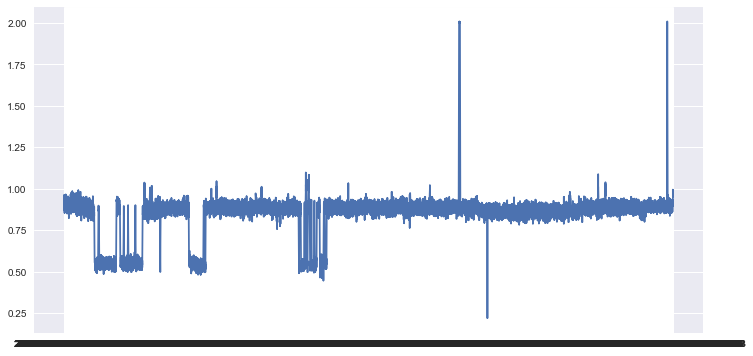

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(tb46_dt['TEST_ID'], tb46_dt['WEIGHT_VALUE'])
plt.show()

设备101生产的大红鹰(软蓝)系列品牌的重量值（未平均处理）绘图：

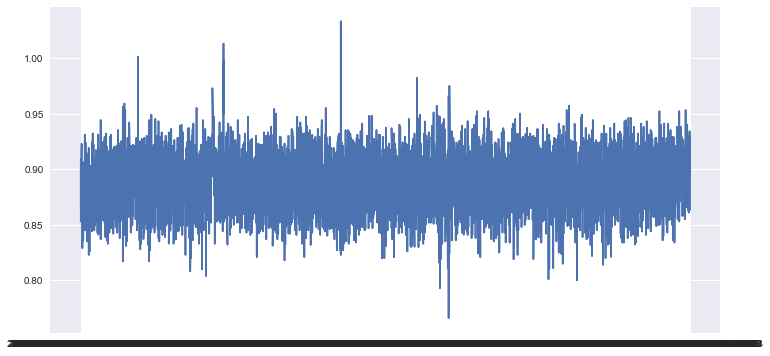

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(tb46_dt_dhy['TEST_ID'], tb46_dt_dhy['WEIGHT_VALUE'])
plt.show()

设备101生产的大红鹰(软蓝)系列品牌的重量值（平均处理）绘图：

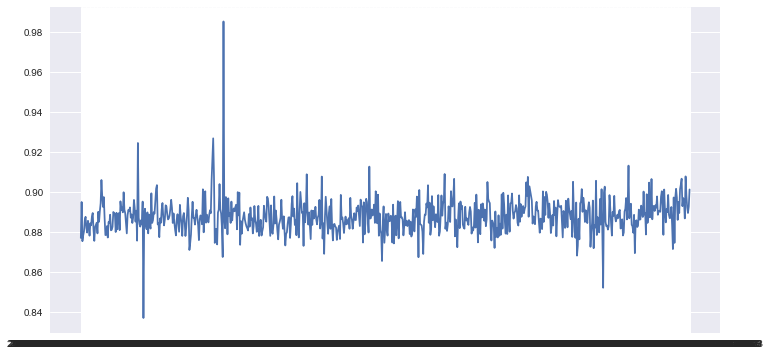

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(tb46_dt_mean['WEIGHT_VALUE'])
plt.show()

设备101生产的大红鹰(软蓝)系列品牌的重量值（平均处理）正态性检验：

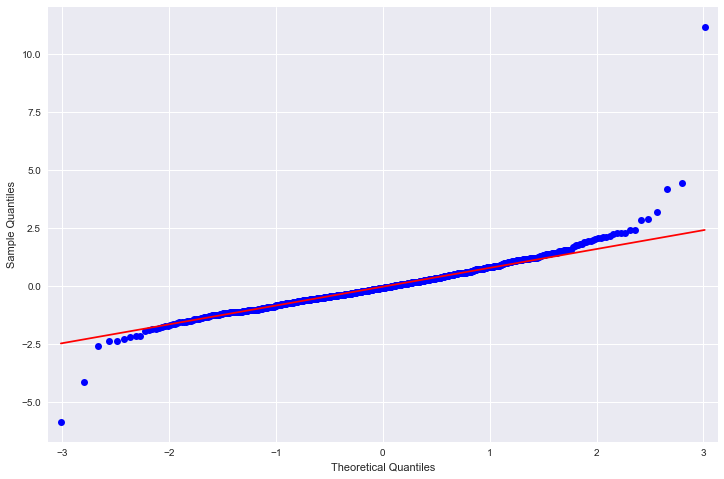

In [58]:
from statsmodels.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(tb46_dt_mean['WEIGHT_VALUE'], line='q', ax=ax, fit=True)

## 表21  MT_DC_PM_MP_GD1057DATA_CUR  包装机剔除数据
## 表23  MT_DC_PM_MP_PT1057DATA_CUR  卷接机剔除数据

### 剔除代码对应表

In [59]:
rejectname = pd.read_csv('MT_DC_PB_REJECTCODE.csv')[['PM_MP_REJECTCODE_ID', 'REJECTNAME']]
rejectname

,PM_MP_REJECTCODE_ID,REJECTNAME
0,9000007,烟支模盒堵塞而剔除
1,9000008,光电探测器电路板故障而剔除
2,9000009,烟支空头而剔除
3,9000010,光电探测器测出缺烟而剔除
4,9000011,手动剔除未对齐的铝箔纸数
5,9000012,剔除：鼓轮3第一前部商标纸耳
6,9000013,剔除：鼓轮3第二前部商标纸耳
7,9000014,剔除：鼓轮3第一后部商标纸耳
8,9000016,剔除：鼓轮3第二后部商标纸耳
9,9000017,包装时间过长而剔除


### 包装机

In [60]:
tb21 = pd.merge(tb_21, rejectname, how='left')[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'PM_MP_REJECTCODE_ID', 'REJECTVALUE', 'REJECTNAME']]
tb21

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
0,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100046,95,盒模内存有空头烟
1,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100054,23,第三轮剔除
2,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100068,24,盒片剔除总数
3,2017-04-17,1,214,10001586,2017-04-17 15:56:52,6100071,4,盒片第二槽护门
4,2017-07-24,1,215,10001586,2017-07-24 09:51:43,6100046,5,盒模内存有空头烟
5,2016-08-18,1,212,10001586,2016-08-18 15:56:55,6100048,273,烟包剔除
6,2017-04-15,1,218,10001586,2017-04-15 15:57:18,6100022,400,条盒不全
7,2017-07-28,1,207,10001586,2017-07-28 15:10:34,6100030,47,烟包盒看片粘胶干燥
8,2017-07-27,1,219,10001586,2017-07-27 15:04:37,6100045,2,弹性壁阻塞
9,2017-07-28,1,219,10001586,2017-07-28 15:09:46,6100059,28,第六轮剔除


### 卷接机

In [61]:
tb23 = pd.merge(tb_23, rejectname, how='left')[['PRODUCEDATE', 'PB_SHIFT_ID', 'PM_MP_MACHINE_ID', 'PB_PRODUCT_ID', 'GATHERDATETIME', 'PM_MP_REJECTCODE_ID', 'REJECTVALUE', 'REJECTNAME']]
tb23

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
0,2017-07-17,1,105,10001586,2017-07-17 10:14:37,105002,15,过 重
1,2016-07-27,1,107,10001586,2016-07-27 15:57:07,105003,213,软 点
2,2016-07-27,1,107,10001586,2016-07-27 15:57:07,105005,208,轻端剔出
3,2017-06-28,1,116,10001586,2017-06-28 15:59:42,107005,3133,手动剔出
4,2016-07-23,3,101,10001586,2016-07-23 01:41:00,105001,117,过 轻
5,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107003,476,空头
6,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107004,2292,缺嘴棒
7,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107005,162,手动剔出
8,2016-07-24,3,108,10001586,2016-07-24 07:17:08,105001,206,过 轻
9,2016-07-24,3,108,10001586,2016-07-24 07:17:08,105002,135,过 重


### 卷接机剔除原因种类及数量排行

In [62]:
tb23.groupby(['PM_MP_REJECTCODE_ID', 'REJECTNAME']).size().sort_values(ascending=False)

PM_MP_REJECTCODE_ID  REJECTNAME
107003               空头            660
107004               缺嘴棒           658
105002               过 重           627
107001               漏气            579
107005               手动剔出          578
105004               硬 点           561
105001               过 轻           497
105005               轻端剔出          368
105003               软 点           367
105009               SRM＿取样        141
107006               成形缺陷           18
105006               淡色点            11
107002               稀释度             9
107007               金属颗粒            7
105008               印刷不良            6
105007               深色点             5
107011               光检系统            1
dtype: int64

### 所有设备空头剔除量排行

In [63]:
tb23.query("PM_MP_REJECTCODE_ID == 107003").sort_values('REJECTVALUE', ascending=False)

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
1952,2016-07-15,2,106,10001586,2016-07-15 23:57:16,107003,47613,空头
1949,2016-07-15,2,106,10001586,2016-07-15 23:02:26,107003,41227,空头
2605,2016-07-10,3,106,10001586,2016-07-10 07:12:43,107003,32257,空头
1892,2016-07-11,2,106,10001586,2016-07-11 23:56:18,107003,26530,空头
1834,2016-07-10,3,106,10001586,2016-07-10 06:16:35,107003,25901,空头
2130,2016-06-16,1,105,10001586,2016-06-16 15:57:44,107003,22942,空头
919,2016-07-22,2,109,10001586,2016-07-22 23:57:09,107003,22011,空头
1912,2016-07-28,3,115,10001586,2016-07-28 07:17:04,107003,21374,空头
2639,2016-07-19,2,109,10001586,2016-07-19 23:57:11,107003,18018,空头
2557,2016-07-06,1,110,10001586,2016-07-06 15:57:25,107003,17657,空头


### 设备101所有班次空头剔除量

In [64]:
tb23_kt = tb23.query("PM_MP_MACHINE_ID == '101' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2806,2016-06-04,3,101,10001586,2016-06-04 06:17:35,107003,1272,空头
2822,2016-06-04,3,101,10001586,2016-06-04 06:54:01,107003,1547,空头
2839,2016-07-06,2,101,10001586,2016-07-06 20:30:01,107003,2287,空头
2847,2016-07-06,2,101,10001586,2016-07-06 20:32:30,107003,2310,空头
2855,2016-07-06,2,101,10001586,2016-07-06 21:53:04,107003,2902,空头
2863,2016-07-06,2,101,10001586,2016-07-06 22:23:00,107003,3307,空头
2871,2016-07-06,2,101,10001586,2016-07-06 22:46:47,107003,3520,空头
2879,2016-07-06,2,101,10001586,2016-07-06 22:47:09,107003,3526,空头
2887,2016-07-06,2,101,10001586,2016-07-06 22:49:47,107003,3570,空头
2895,2016-07-06,2,101,10001586,2016-07-06 23:12:36,107003,3878,空头


### 设备101产生空头的日期及数量

In [65]:
tb23_kt.groupby('PRODUCEDATE').size()

PRODUCEDATE
2016-06-04     2
2016-07-06     9
2016-07-08     1
2016-07-12     1
2016-07-14     1
2016-07-15    14
2016-07-19     9
2016-07-22     4
2016-07-23    18
2017-07-19     1
2017-07-27     1
2017-07-28     1
dtype: int64

### 设备101早班空头剔除量

In [66]:
tb23_kt1 = tb23.query("PB_SHIFT_ID == 1 & PM_MP_MACHINE_ID == '101' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt1

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2590,2016-07-08,1,101,10001586,2016-07-08 15:51:24,107003,4911,空头
2582,2016-07-12,1,101,10001586,2016-07-12 15:47:24,107003,4295,空头
2574,2016-07-14,1,101,10001586,2016-07-14 15:53:37,107003,3662,空头
759,2016-07-15,1,101,10001586,2016-07-15 09:01:37,107003,264,空头
1723,2016-07-15,1,101,10001586,2016-07-15 09:04:08,107003,299,空头
1751,2016-07-15,1,101,10001586,2016-07-15 09:14:14,107003,381,空头
1984,2016-07-15,1,101,10001586,2016-07-15 10:31:58,107003,847,空头
1989,2016-07-15,1,101,10001586,2016-07-15 10:35:22,107003,882,空头
1998,2016-07-15,1,101,10001586,2016-07-15 11:38:31,107003,1733,空头
2008,2016-07-15,1,101,10001586,2016-07-15 11:39:27,107003,1745,空头


### 设备101中班空头剔除量

In [67]:
tb23_kt2 = tb23.query("PB_SHIFT_ID == 2 & PM_MP_MACHINE_ID == '101' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt2

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2839,2016-07-06,2,101,10001586,2016-07-06 20:30:01,107003,2287,空头
2847,2016-07-06,2,101,10001586,2016-07-06 20:32:30,107003,2310,空头
2855,2016-07-06,2,101,10001586,2016-07-06 21:53:04,107003,2902,空头
2863,2016-07-06,2,101,10001586,2016-07-06 22:23:00,107003,3307,空头
2871,2016-07-06,2,101,10001586,2016-07-06 22:46:47,107003,3520,空头
2879,2016-07-06,2,101,10001586,2016-07-06 22:47:09,107003,3526,空头
2887,2016-07-06,2,101,10001586,2016-07-06 22:49:47,107003,3570,空头
2895,2016-07-06,2,101,10001586,2016-07-06 23:12:36,107003,3878,空头
2565,2016-07-06,2,101,10001586,2016-07-06 23:50:45,107003,4229,空头
1855,2016-07-19,2,101,10001586,2016-07-19 19:51:35,107003,1432,空头


### 设备101夜班空头剔除量

In [68]:
tb23_kt3 = tb23.query("PB_SHIFT_ID == 3 & PM_MP_MACHINE_ID == '101' & PM_MP_REJECTCODE_ID == 107003").sort_values('GATHERDATETIME')
tb23_kt3

,PRODUCEDATE,PB_SHIFT_ID,PM_MP_MACHINE_ID,PB_PRODUCT_ID,GATHERDATETIME,PM_MP_REJECTCODE_ID,REJECTVALUE,REJECTNAME
2806,2016-06-04,3,101,10001586,2016-06-04 06:17:35,107003,1272,空头
2822,2016-06-04,3,101,10001586,2016-06-04 06:54:01,107003,1547,空头
5,2016-07-23,3,101,10001586,2016-07-23 01:41:00,107003,476,空头
52,2016-07-23,3,101,10001586,2016-07-23 01:41:02,107003,476,空头
1278,2016-07-23,3,101,10001586,2016-07-23 01:49:06,107003,517,空头
1918,2016-07-23,3,101,10001586,2016-07-23 01:49:08,107003,517,空头
1924,2016-07-23,3,101,10001586,2016-07-23 01:59:40,107003,587,空头
1934,2016-07-23,3,101,10001586,2016-07-23 01:59:51,107003,587,空头
2476,2016-07-23,3,101,10001586,2016-07-23 02:13:17,107003,617,空头
2483,2016-07-23,3,101,10001586,2016-07-23 03:09:44,107003,980,空头


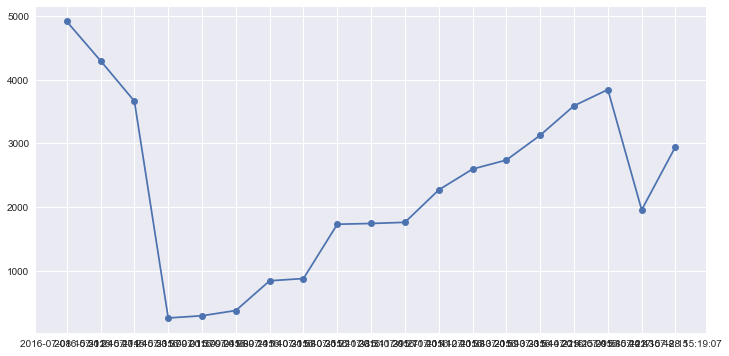

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt1['GATHERDATETIME'], tb23_kt1['REJECTVALUE'], 'o-')
plt.show()

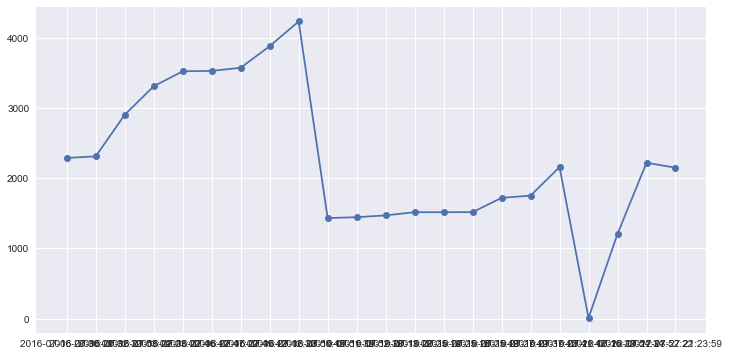

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt2['GATHERDATETIME'], tb23_kt2['REJECTVALUE'], 'o-')
plt.show()

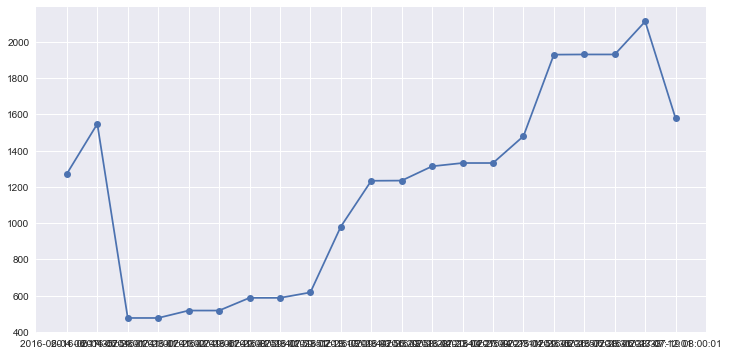

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt3['GATHERDATETIME'], tb23_kt3['REJECTVALUE'], 'o-')
plt.show()

### 设备101所有班次空头剔除量

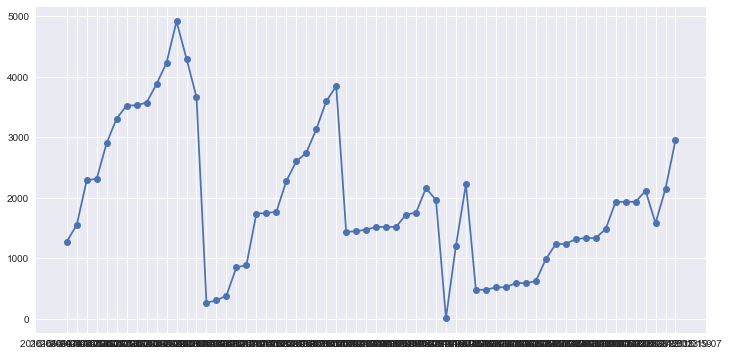

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(tb23_kt['GATHERDATETIME'], tb23_kt['REJECTVALUE'], 'o-')
plt.show()

### 一阶差分处理

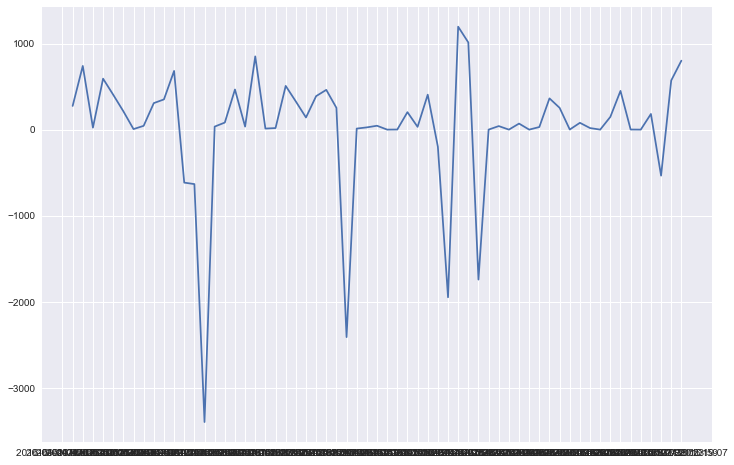

In [73]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = tb23_kt['REJECTVALUE'].diff(1)
plt.plot(tb23_kt['GATHERDATETIME'], diff1)
plt.show()